# Machine Learning Confusion Matrix for heart failer Datasets

In [1]:
import pandas as pd

df = pd.read_csv('heart failure.csv')

In [2]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
import seaborn as sns

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
96/(96+203) # 32% people death

0.3210702341137124

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

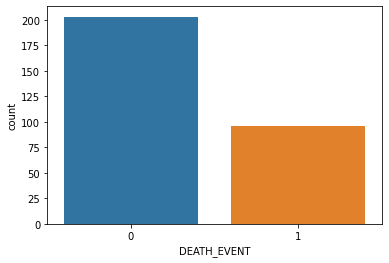

In [7]:
sns.countplot(x='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='count', ylabel='DEATH_EVENT'>

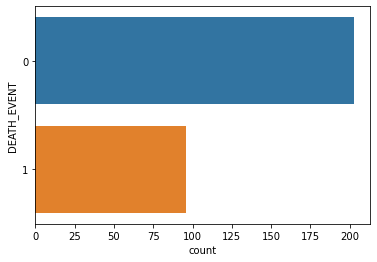

In [8]:
sns.countplot(y='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='count', ylabel='diabetes'>

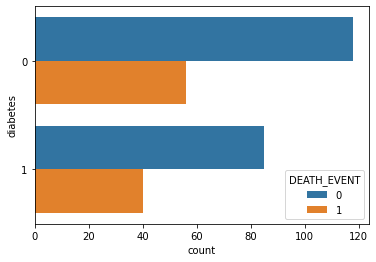

In [9]:
sns.countplot(y='diabetes',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

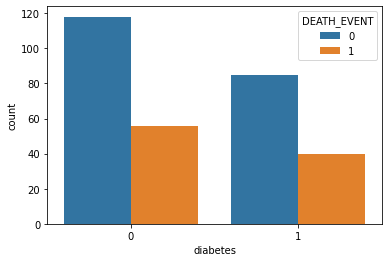

In [10]:
sns.countplot(x='diabetes',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

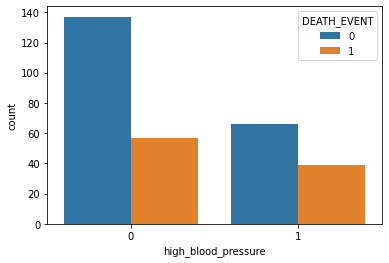

In [11]:
sns.countplot(x='high_blood_pressure',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='anaemia', ylabel='count'>

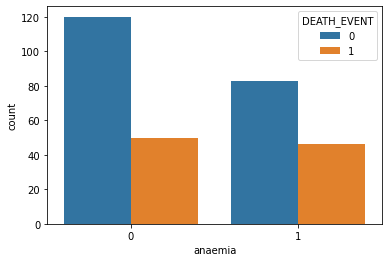

In [12]:
sns.countplot(x='anaemia',data=df, hue='DEATH_EVENT')

In [13]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [14]:
50/(120+50) #People death without anaemia 29%

0.29411764705882354

In [15]:
49/(80+49) #People death in anaemia 38%

0.3798449612403101

# Define x and y and splitting for train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT',axis=1),df['DEATH_EVENT'],train_size=.70, random_state=1)

In [18]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [19]:
ytrain.head()

14     0
210    0
236    0
44     1
163    1
Name: DEATH_EVENT, dtype: int64

In [20]:
ytrain.value_counts()

0    139
1     70
Name: DEATH_EVENT, dtype: int64

In [21]:
70/(139+70)

0.3349282296650718

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier()

In [24]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [25]:
testing = clf.predict(xtest)

In [26]:
testing # predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [27]:
import numpy as np
np.array(ytest) # actual result

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [28]:
clf.score(xtest,ytest)

0.8

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, plot_roc_curve

In [30]:
classification_report(ytest, testing)

'              precision    recall  f1-score   support\n\n           0       0.85      0.88      0.86        64\n           1       0.67      0.62      0.64        26\n\n    accuracy                           0.80        90\n   macro avg       0.76      0.75      0.75        90\nweighted avg       0.80      0.80      0.80        90\n'

In [31]:
print(classification_report(ytest, testing))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        64
           1       0.67      0.62      0.64        26

    accuracy                           0.80        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.80      0.80      0.80        90



In [32]:
xtest.shape

(90, 12)

In [35]:
confusion_matrix(ytest, testing)

array([[56,  8],
       [10, 16]])

In [36]:
con_mat = confusion_matrix(ytest, testing)

In [37]:
con_mat

array([[56,  8],
       [10, 16]])

In [38]:
(58+16)/(58+16+6+10) #accuracy

0.8222222222222222

<AxesSubplot:>

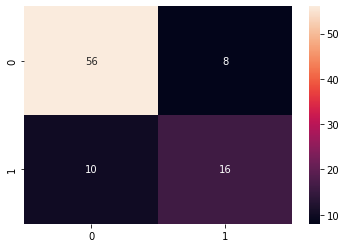

In [40]:
sns.heatmap(con_mat,annot=True)

In [41]:
tp,fn,fp,tn=confusion_matrix(ytest,testing).reshape(-1)

In [42]:
tp

56

In [43]:
fn

8

In [44]:
fp

10

In [45]:
tn

16

In [48]:

Accuracy = (tp+tn)/(tp+fp+tn+fn)


In [47]:
Accuracy

0.8

In [49]:
# Precision or Positive Predictive Value(PPV)= tp/(tp+fp)

Precision = tp/(tp+fp)

In [50]:
Precision

0.8484848484848485

In [55]:
# Sensitivity, Recall, Hit rate, or True Positive Rate(TPR)
TPR = tp/(tp+fn)

In [56]:
TPR

0.875

In [58]:
# False Positive Rate(FPR) or 1-Specificity

FPR = fp/(fp+tn)

In [59]:
FPR

0.38461538461538464

In [64]:
# F1 Measure = (precision+Recall)/2

F1_Measure = (Precision+TPR)/2

In [65]:
F1_Measure 

0.8617424242424243

In [66]:
# Harmonic Mean, F1 Score

# F1 = (2*Precision*Recall)/(Precision*Recall)
F1 = (2*Precision*TPR)/(Precision*TPR)

In [67]:
F1

2.0

In [68]:
# Specificity, Selectivity or True Negative Rate(TNR)

Specificity = tn/(tn+fp)

In [69]:
Specificity

0.6153846153846154

In [70]:
# Threat Score(TS) or Critical Sccess Index(CSI)
CSI = tp/(tp+fn+fp)

In [71]:
CSI

0.7567567567567568

In [72]:
# False Discovery Rate(FDR)

FDR = fp/(tp+fp)

In [73]:
FDR 

0.15151515151515152

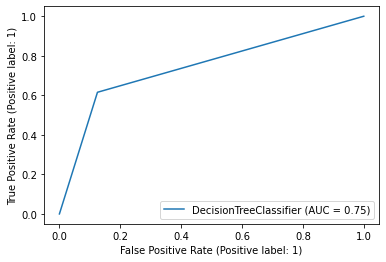

In [51]:
plot_roc_curve(clf,xtest,ytest)

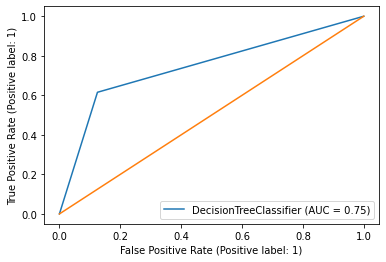

In [52]:
import matplotlib.pyplot as plt

plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])
